# This model is trained to predict the burnt calories based on the BMI, Heart-Rate, Body-Temperature, Duration of Activity etc.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('calories.csv')

# EDA

In [3]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [4]:
df.shape

(15000, 9)

In [5]:
df.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [6]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


<Axes: >

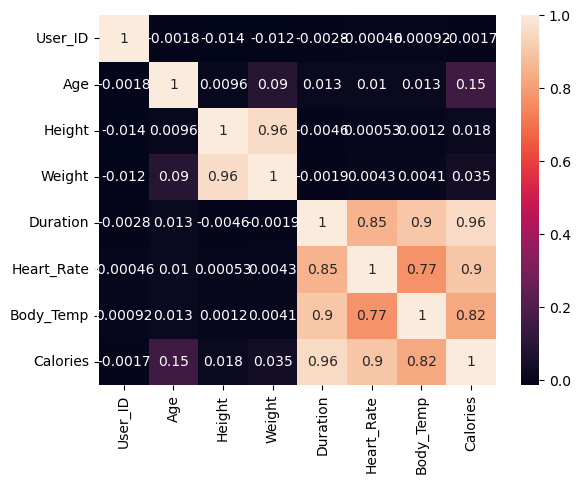

In [8]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

<Axes: xlabel='Body_Temp', ylabel='Heart_Rate'>

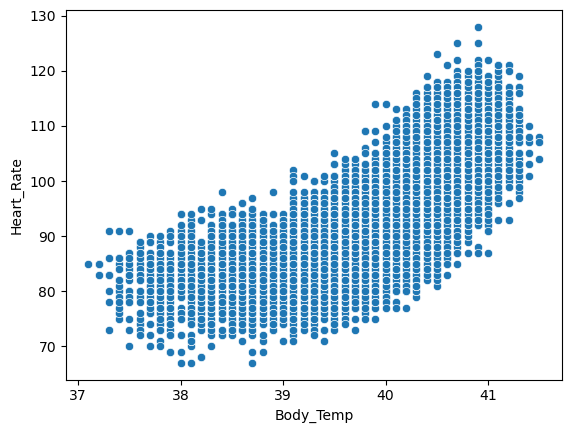

In [9]:
sns.scatterplot(x=df['Body_Temp'], y=df['Heart_Rate'])

<Axes: xlabel='Body_Temp', ylabel='Calories'>

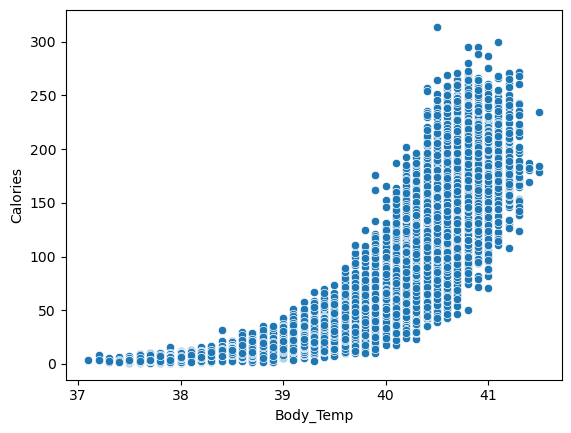

In [10]:
sns.scatterplot(x=df['Body_Temp'], y=df['Calories'])

<Axes: xlabel='Duration', ylabel='Calories'>

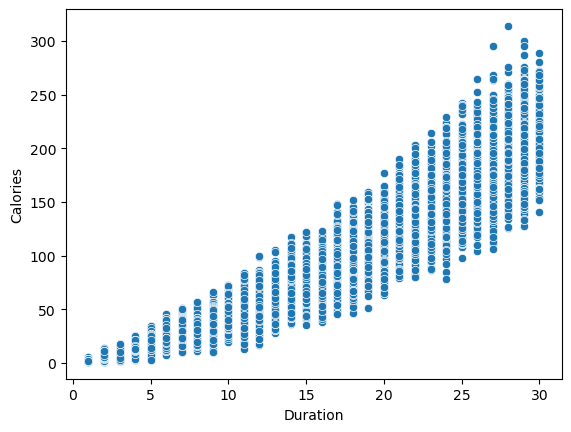

In [11]:
sns.scatterplot(x=df['Duration'], y=df['Calories'])

<Axes: xlabel='Heart_Rate', ylabel='Calories'>

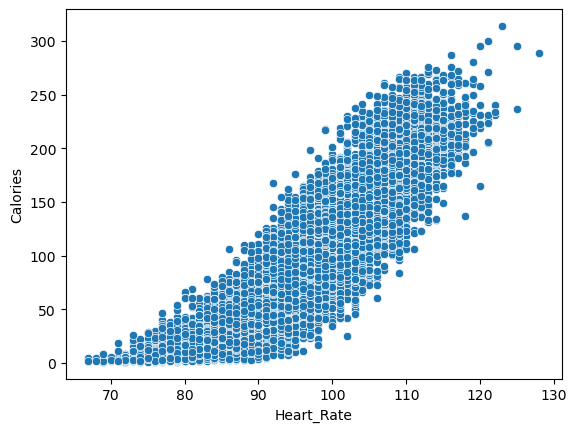

In [12]:
sns.scatterplot(x=df['Heart_Rate'], y=df['Calories'])

<Axes: xlabel='Gender', ylabel='Calories'>

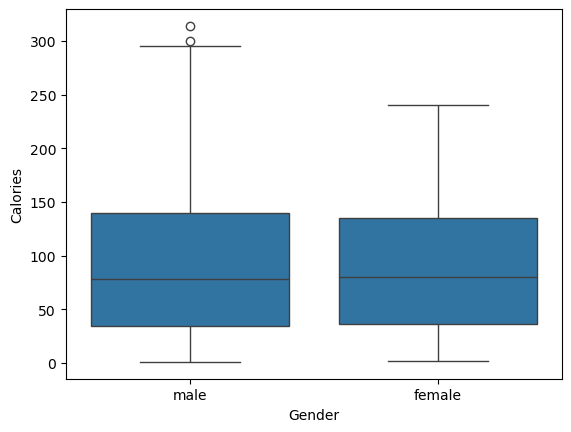

In [13]:
sns.boxplot(x='Gender', y='Calories', data=df)

# Data Cleaning
#### droping duplicate row & User_ID col

In [34]:
df.duplicated().sum()

np.int64(1)

In [35]:
df[df.duplicated(keep=False)]

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI
8266,0,28,164.0,59.0,9.0,90.0,39.5,40.0,21.936347
12852,0,28,164.0,59.0,9.0,90.0,39.5,40.0,21.936347


In [36]:
df.drop_duplicates(keep='first', inplace=True) # keep the first occurance and delete the rest of duplicate rows

In [37]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.drop('User_ID', axis=1, inplace=True)

# Feature engineering

In [19]:
df['Height_meter'] = df['Height']/100

In [20]:
bmi = df['Weight'] / (df['Height_meter'])**2
df['BMI'] = bmi
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Height_meter,BMI
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0,1.90,26.038781
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0,1.66,21.773842
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0,1.79,24.655910
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0,1.79,22.159109
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0,1.54,24.456063


In [21]:
df.drop('Height_meter', axis=1, inplace=True)

In [22]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0,26.038781
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0,21.773842
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0,24.655910
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0,22.159109
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0,24.456063


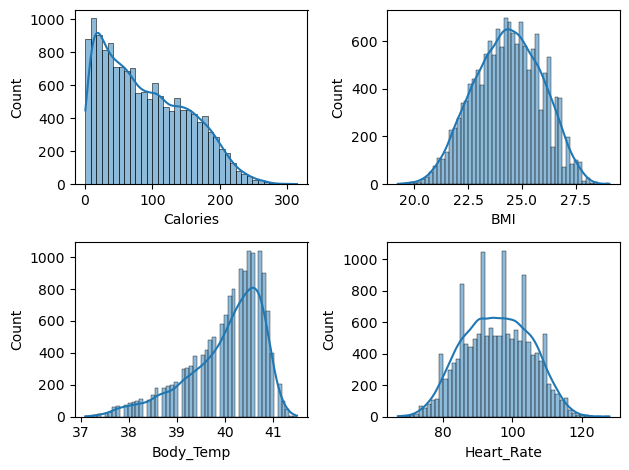

In [23]:
cols = ['Calories', 'BMI', 'Body_Temp', 'Heart_Rate']
def plotting(col, num): 
    plt.subplot(2,2, num)
    sns.histplot(df[col], kde=True)

i = 1;
for col in cols: 
    plotting(col, i)
    i += 1

plt.tight_layout()

# Data Processsing
### Label encoding

In [24]:
gender = {
    'male': 1,
    'female': 0
}

df['Gender'] = df['Gender'].map(gender)

In [25]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0,26.038781
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0,21.773842
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0,24.655910
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0,22.159109
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0,24.456063


# Split Dataset

In [26]:
X = df.drop('Calories', axis=1)
y = df['Calories']

### Divide into train (75%) and test (25%) sets

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Model Selection & Training
### Training the Model using Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [30]:
li_model = LinearRegression()

In [31]:
li_model.fit(X_train, y_train)
y_pred = li_model.predict(X_test)

# Model Accuray/Evaluation

In [32]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n = df.shape[0]
p = df.shape[1]
adjusted_r2 = 1 - ((1-r2)*(n-1))/(n-p-1)

print("Mean Squared Error: ", round(mse, 4))
print("Mean Absolute Error: ", round(mae, 4))
print("R Square Accuracy: ", round(r2,4))
print("Ajusted R2 Accuracy: ", round(adjusted_r2,4))

Mean Squared Error:  126.1864
Mean Absolute Error:  8.1931
R Square Accuracy:  0.9681
Ajusted R2 Accuracy:  0.9681


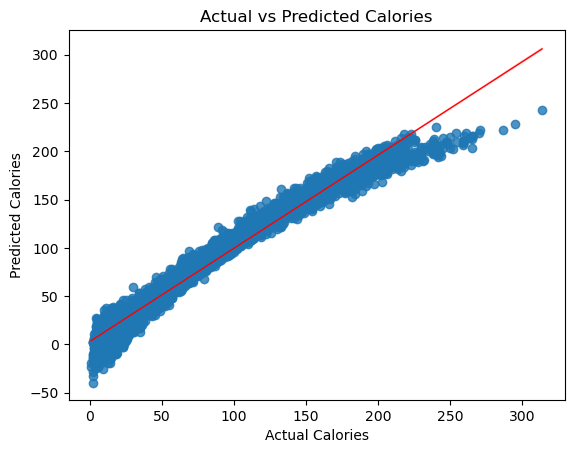

In [33]:
sns.regplot(x=y_test, y=y_pred, line_kws={"color":"red", "linewidth":1})
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted Calories")
plt.show()

# Outcome
##### The Linear Regression Model estimates calorie burn very accurately, On average, predictions differ by ~8 calories. With an MSE of ~126 and R2 of 0.9681, the model captures most of the variation in actual calories, making its estimates reliable and closely aligned with the real data.